In [3]:
import numpy as np
from scipy.io import wavfile
import librosa
import matplotlib.pyplot as plt
import pylab

import IPython.display as ipd

from microfaune import audio, plot

# Load audio

In [4]:
fs, data = audio.load_wav('toy_data/bird1.wav')

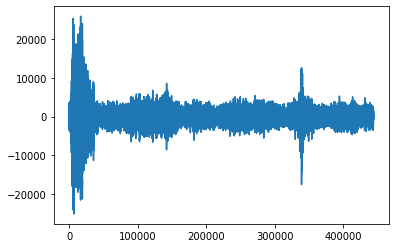

In [5]:
plt.plot(data)

# Listen to the audio

In [6]:
ipd.Audio('toy_data/bird1.wav')

# Create Mel Spectrogram from the audio

In [8]:
fs = 44100
# From Cakir
N_MELS = 40

# MEL spec from STFT 40 ms and 20 ms overlap
N_FFT = int(0.04 * fs) + 1
HOP_LEN = int(0.02 * fs) + 1

In [9]:
S = audio.create_spec(data[:(44100 * 10)], fs, n_mels = N_MELS, n_fft = N_FFT, hop_len = HOP_LEN)

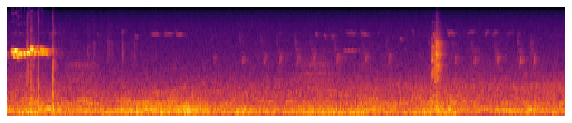

In [10]:
pylab.rcParams['figure.figsize'] = (20, 2)

plot.plot_spec(S)